# Visuals and Customer Profiling

1. Import Libraries and Data
2. Descriptive Visuals (Histogram)- Order Time
3. Bar Chart - Customer Loyalty
4. Line Chart - Prices
5. Scatterplot - Age vs Income

# 01. Import Libraries and Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\lizan\Desktop\Data Analytics\4.0\31-05-2022 Instacart Basket Analysis'

In [4]:
ords_prods_cx = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_merged.pkl'))

In [23]:
ords_prods_cx.shape

(32404859, 30)

In [24]:
ords_prods_cx.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [25]:
ords_prods_cx.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time', 'days_since_prior_order', 'new_customer', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest_Day',
       'Busiest_Days', 'Busiest_Hours', 'max_order', 'loyalty_flag',
       'First Name', 'Surnam', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

# 02. Descriptive Visuals

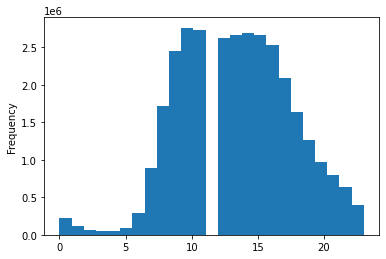

In [21]:
# Create histogram for order time
hist = ords_prods_cx['order_time'].plot.hist(bins = 25)

This histogram shows that the most orders are placed between 10am and 3pm.

In [12]:
ords_prods_cx['order_time'].value_counts()

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_time, dtype: int64

In [22]:
hist.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'hist_time.png'))

# 03. Bar Chart Custmer Loyalty

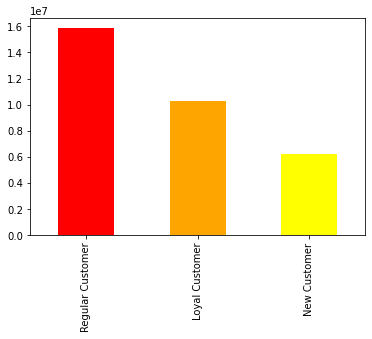

In [28]:
# Create a bar chart for customer loyalty 
bar = ords_prods_cx['loyalty_flag'].value_counts().plot.bar(color = ['red', 'orange', 'yellow'])

In [29]:
bar.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'bar_loyalty.png'))

# 04. Line Chart - Prices

In [30]:
# Create a 70/30 sample for line chart comparing prices to order times
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cx)) <= 0.7

In [31]:
# Split datafrome into two samples big (70%) and small (30%)

big = ords_prods_cx[dev]
small = ords_prods_cx[~dev]

In [32]:
len(big) + len(small)

32404859

In [33]:
# Refine the dataframe to be plotted to only the columns needed in the small sample
df = small[['order_time', 'prices']]

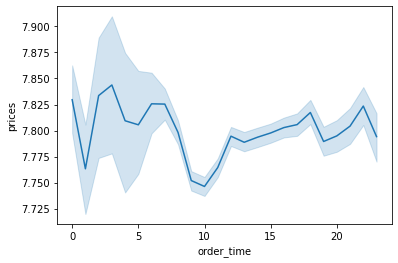

In [35]:
line = sns.lineplot(data = df, x = 'order_time', y = 'prices')

In [36]:
line.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'line_time.png'))

In [37]:
# Create a 70/30 sample for line chart age and number of dependents
df_2 = small[['Age','n_dependants']]

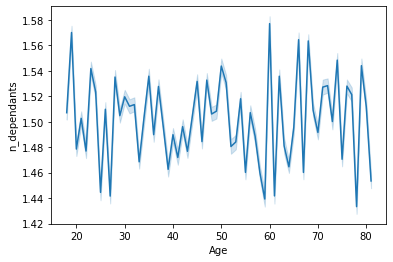

In [38]:
line2 = sns.lineplot(data = df_2, x = 'Age', y = 'n_dependants')

This line chart does not show a clear relationship between age and numnber of dependents.  The trend line would be about straight at 1.5 dependens across the ages.  

In [39]:
line2.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'line_age_kids.png'))

# 05. Scatterplot - Age vs Income

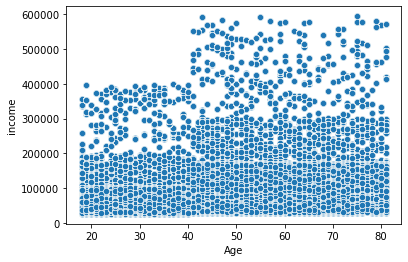

In [40]:
# Scatter plot showing age versus income
scatter = sns.scatterplot(x = 'Age', y = 'income', data = ords_prods_cx)

In [44]:
scatter.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'scatter_age_income.png'))

This scatter plot shows that spending power is higher for users over the age of 40 and generally continues to stay high until 80.